# Data Manipulation with Pandas

In [1]:
import pandas as pd
pd.DataFrame

pandas.core.frame.DataFrame

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [11]:
import numpy as np
type(np.arange(5))

numpy.ndarray

In [7]:
data = pd.Series([25, 5, 7, 1])
data
type(data)

0    25
1     5
2     7
3     1
dtype: int64

pandas.core.series.Series

In [13]:
data.values.copy()

array([25,  5,  7,  1], dtype=int64)

In [12]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
data[1]

5

In [10]:
data[1:3]

1    5
2    7
dtype: int64

### ``Series``: a NumPy array with an explicit index

In [16]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'k'])
data

a    0.25
b    0.50
c    0.75
k    1.00
dtype: float64

In [18]:
data['b']

0.5

#### Indices can be non-contiguous or non-sequential:

In [19]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 5, 7])
data

2    0.25
5    0.50
5    0.75
7    1.00
dtype: float64

In [20]:
data[2]
data[1:3]

0.25

5    0.50
5    0.75
dtype: float64

### Series as specialized dictionary

In [35]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

By default, the index is drawn from the **sorted** keys.

In [31]:
list(population)



[26448193, 19552860]

``Series`` also supports array-style operations such as slicing:

In [24]:
population[1:4]

Florida     19552860
Illinois    12882135
New York    19651127
dtype: int64

#### Note the different treatment of `stop` element

### Other ways to construct Series objects

Have index determine size, using scalar arg. as default value, repeated to fill the specified index:

In [442]:
data = pd.Series(5, index=[100, 200, 300])
data

100    5
200    5
300    5
dtype: int64

In each case, the index can be explicitly set if a different result is preferred:

In [182]:
pd.Series({2:'a', 1:'b', 3:'c'} ,index=[3, 2])

3    c
2    a
dtype: object

Notice that in this case, the ``Series`` is populated only with the explicitly identified keys.

### DataFrame as a generalized NumPy array
A sequence of aligned ``Series`` objects, i.e. sharing the same index.

In [33]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [36]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [37]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``Index`` object holding the column labels:

In [38]:
states.columns

Index(['area', 'population'], dtype='object')

### DataFrame as specialized dictionary

A ``DataFrame`` maps a column name to a ``Series`` of column data.

In [207]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

#### From a list of dicts (acting as records)

In [39]:
data = [{'a': i, 'b': 2 * i}for i in range(3)]
print(data)
pd.DataFrame(data, index=['a','b','n'])

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


,a,b
a,0,0
b,1,2
n,2,4


Aligned on index, missing values filled in as ``NaN`` (i.e., "not a number")

In [40]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a two-dimensional NumPy array

Create a ``DataFrame`` with any specified column and index names (default: an integer index)

In [43]:
import numpy as np
df = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
df

,foo,bar
a,0.250127,0.852336
b,0.526444,0.688449
c,0.793700,0.704807


#### From a NumPy structured array

We covered structured arrays in [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb).
A Pandas ``DataFrame`` operates much like a structured array, and can be created directly from one:

In [63]:
import numpy as np 
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0,  0.), (0,  0.), (0,  0.)],
      dtype=[('A', '<i8'), ('B', '<f8')])

In [471]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

An *immutable array* and an *ordered multi-set* 

In [42]:
ind = pd.Index([2, 3, 5, 5.0, 3, 7, 11])
ind

Float64Index([2.0, 3.0, 5.0, 5.0, 3.0, 7.0, 11.0], dtype='float64')

### Index as immutable array


In [43]:
ind[1]

3.0

In [44]:
ind[::2]

Float64Index([2.0, 5.0, 3.0, 11.0], dtype='float64')

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [45]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

7 (7,) 1 float64


However, ``Index`` objects are immutable: they cannot be modified and thus safely shared

In [46]:
ind[0] = 1

TypeError: Index does not support mutable operations

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic.
The ``Index`` object follows many of the conventions used by Python's built-in ``set`` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [47]:
indA = pd.Index([1, 3, 7, 5, 7, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [479]:
indB & indA # intersection

Int64Index([3, 5, 7, 7, 7], dtype='int64')

In [480]:
indB | indA  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [481]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

These operations may also be accessed via object methods, for example ``indA.intersection(indB)``.

# Data Indexing and Selection

### Series as dictionary

In [73]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 )
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [75]:

data.iloc[1:3]


1    0.50
2    0.75
dtype: float64

In [50]:
'a' in data

True

In [76]:
TypeError?

In [54]:
list(data.items())

[('a', 0.25), ('a', 0.5), ('c', 0.75), ('d', 1.0)]

In [58]:
data['f'] = 1.4
data.index + 'cc'

Index(['acc', 'acc', 'ccc', 'dcc', 'fcc'], dtype='object')

### Series as one-dimensional (numpy) array

A ``Series`` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, *slices*, *masking*, and *fancy indexing*.

Use attributes **loc** and **iloc** to distinguish explicit (loc) from implicit, i.e. based on position (iloc)

In [60]:
# slicing by explicit index
data['c':'d']

c    0.75
d    1.00
dtype: float64

In [61]:
# slicing by implicit integer index
data[1:3]


a    0.50
c    0.75
dtype: float64

In [504]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [85]:
# fancy indexing
data
data.iloc[[2,1]]
data.values[[2,1]]

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

2    0.75
1    0.50
dtype: float64

array([ 0.75,  0.5 ])

+ when slicing with explicit index (i.e., ``data['a':'c']``), the final index is *included* 
+ when slicing with an implicit index (i.e., ``data[0:2]``), the final index is *excluded*

## Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [87]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [88]:
data['area']


California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [90]:
data.area
type(data.area)

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

pandas.core.series.Series

In [91]:
data.area is data['area']
type(data.area)

True

pandas.core.series.Series

Does not work if not a proper identifier or if conflicts with other attributes

In [249]:
type(data.pop)
# data
# if 'pop' in data:
#     data.pop('pop')
# data

method

Do not  column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [92]:

data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


### DataFrame as two-dimensional array

In [93]:
data['pop']

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
Name: pop, dtype: int64

Many operations on dataframes are operations on its values array:

In [96]:
data
dd = data  #.drop('density', axis=1)
dd = dd.T
id(dd)
dd is data
data.values

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


2679833737592

False

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64481930e+07,   3.80187404e+01]])

In array, passing a single index to an array accesses a row:

In [253]:
dd.values[0]

array([ 423967.,  170312.,  149995.,  141297.,  695662.])

But a single "index" to a ``DataFrame`` accesses a column:

In [105]:
data.values[:1, :2]

array([[   423967.,  38332521.]])

Use the ``iloc`` indexer to index the underlying array as a NumPy array (implicit Python-style index). Note: ``DataFrame`` index and column labels are maintained in resulting dataframe.

In [255]:
b = data.values[:3, :1]
b[0] = 0
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [497]:
data 
data['density'] = data['pop'] / data['area']
data.loc[:,"pop":"density"]

,area,pop
California,0,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,0
Texas,695662,26448193


,pop,density
California,38332521,inf
Florida,19552860,114.806121
Illinois,12882135,85.883763
New York,0,0.000000
Texas,26448193,38.018740


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [110]:
b = data.loc[:, 'area'] 
# b[0] = 9900
a = data.loc['Florida', 'pop']
# a = 1
data

,area,pop,density
California,9900,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


### Additional indexing conventions

First, while *indexing* refers to columns, *slicing* refers to rows:

In [65]:
data.loc['Florida':'Illinois', 'density']

Florida     114.806121
Illinois     85.883763
Name: density, dtype: float64

Such slices can also refer to rows by number rather than by index:

In [504]:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [113]:
data['density'].values > 100
data[data['density'] > 100]

array([False,  True, False,  True, False], dtype=bool)

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


## Indexing and slicing: view or copy?

+  All operations generate a copy

+  If inplace=True is provided, it will modify in-place; only some operations support this
+  An indexer that sets, e.g. .loc/.ix/.iloc/.iat/.at will set inplace.  (NOTE: .ix is/will be deprecated)

+  An indexer that gets on a single-dtyped object is almost always a view (depending on the memory layout it may not be that's why this is not reliable). This is mainly for efficiency. (the example from above is for .query; this will always return a copy as its evaluated by numexpr)

+ An indexer that gets on a multiple-dtyped object is always a copy.


In [130]:
data.loc['area', 'area'] = 9898
data

,area,pop,density,"(Texas, area)","(area, Texas)","(area, Texass)","(area, area)"
California,7.0,38332521.0,90.413926,9.0,99.0,7.0,9898
Florida,7.0,19552860.0,114.806121,9.0,99.0,7.0,9898
Illinois,7.0,12882135.0,85.883763,9.0,99.0,7.0,9898
New York,7.0,19651127.0,139.076746,9.0,99.0,7.0,9898
Texas,7.0,26448193.0,38.018740,9.0,99.0,7.0,9898
area,9898.0,88.0,88.000000,88.0,88.0,88.0,9898


In [119]:
data
data.loc['Texas','area'] = 6
data

,area,pop,density,"(Texas, area)"
California,9900,38332521,90.413926,9
Florida,170312,19552860,114.806121,9
Illinois,149995,12882135,85.883763,9
New York,141297,19651127,139.076746,9
Texas,99,26448193,38.018740,9


,area,pop,density,"(Texas, area)"
California,9900,38332521,90.413926,9
Florida,170312,19552860,114.806121,9
Illinois,149995,12882135,85.883763,9
New York,141297,19651127,139.076746,9
Texas,6,26448193,38.018740,9


In [159]:
a = 10*"hjhjh"
b = 10*"hjhjh"
a is b

False

In [165]:
# data.drop('(area, area)',axis=1)
data
id(data.iloc[0])
id(data.iloc[0])
id(data.loc['California'])
id(data.loc['California'])

,area,pop,density,"(Texas, area)","(area, Texas)","(area, Texass)","(area, area)"
California,44.0,38332521.0,90.413926,9.0,99.0,7.0,9898
Florida,7.0,19552860.0,114.806121,9.0,99.0,7.0,9898
Illinois,7.0,12882135.0,85.883763,9.0,99.0,7.0,9898
New York,7.0,19651127.0,139.076746,9.0,99.0,7.0,9898
Texas,7.0,26448193.0,38.018740,9.0,99.0,7.0,9898
area,9898.0,88.0,88.000000,88.0,88.0,88.0,9898


2679829446952

2679829449976

2679828960816

2679829449976

In [144]:
b = data.loc['California']
b['area']=4
b
data

C:\Users\jos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


area              4.000000e+00
pop               3.833252e+07
density           9.041393e+01
(Texas, area)     9.000000e+00
(area, Texas)     9.900000e+01
(area, Texass)    7.000000e+00
(area, area)      9.898000e+03
Name: California, dtype: float64

,area,pop,density,"(Texas, area)","(area, Texas)","(area, Texass)","(area, area)"
California,44.0,38332521.0,90.413926,9.0,99.0,7.0,9898
Florida,7.0,19552860.0,114.806121,9.0,99.0,7.0,9898
Illinois,7.0,12882135.0,85.883763,9.0,99.0,7.0,9898
New York,7.0,19651127.0,139.076746,9.0,99.0,7.0,9898
Texas,7.0,26448193.0,38.018740,9.0,99.0,7.0,9898
area,9898.0,88.0,88.000000,88.0,88.0,88.0,9898


# Operating on Data in Pandas

As does numpy, pandas provides ufuncs to perform quick element-wise operations:

+ these ufuncs will **preserve index and column labels** in the output and 
+ automatically **align indices** 

## Ufuncs: Index Preservation

Any NumPy ufunc will work on Pandas ``Series`` and ``DataFrame`` objects.

### Index alignment in Series

As an example, suppose we are combining two different data sources, and find only the top three US states by *area* and the top three US states by *population*:

In [166]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
area
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
population

Alaska        1723337
California     423967
Texas          695662
Name: area, dtype: int64

California    38332521
New York      19651127
Texas         26448193
Name: population, dtype: int64

Let's see what happens when we divide these to compute the population density:

In [167]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting index is the *union* of indices of the two input arrays:

In [168]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any missing values are filled in with NaN by default.

Any value can act as fill value for missing elements: 

In [169]:
s1 = pd.Series([2,4,6],index=[0,1,2])
s2 = pd.Series([2,4,6],index=[1,2,3])
s1 + s2
s1.add(s2, fill_value=0)

0     NaN
1     6.0
2    10.0
3     NaN
dtype: float64

0     2.0
1     6.0
2    10.0
3     6.0
dtype: float64

### Index alignment in DataFrame on both columns and indices

In [170]:
import numpy as np
rng = np.random.RandomState(43)  # random generator with specific seed

A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
A
B
A+B

,A,B
0,4,0
1,17,16


,B,A,C
0,3,1,2
1,7,0,3
2,2,9,1


,A,B,C
0,5.0,3.0,NaN
1,17.0,23.0,NaN
2,NaN,NaN,NaN


Indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.

In [280]:
fill = A.values.mean()  #.mean()
fill
# A.stack().mean()
A.add(B, fill_value=fill)

9.25

,A,B,C
0,5.00,3.00,11.25
1,17.00,23.00,12.25
2,18.25,11.25,10.25


The following table lists Python operators and their equivalent Pandas object methods:

| Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |


## Ufuncs: Operations Between DataFrame and Series

When performing operations between a ``DataFrame`` and a ``Series``, the index and column alignment is similarly maintained.
Operations between a ``DataFrame`` and a ``Series`` are similar to operations between a two-dimensional and one-dimensional NumPy array.
Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [281]:
A = rng.randint(0,10, size=(3, 4))
A
A - A[0]

array([[2, 2, 3, 5],
       [4, 4, 0, 5],
       [8, 0, 0, 9]])

array([[ 0,  0,  0,  0],
       [ 2,  2, -3,  0],
       [ 6, -2, -3,  4]])

In [283]:
df = pd.DataFrame(A, columns=list('QRST'))
df
df - df.iloc[0]

,Q,R,S,T
0,2,2,3,5
1,4,4,0,5
2,8,0,0,9


,Q,R,S,T
0,0,0,0,0
1,2,2,-3,0
2,6,-2,-3,4


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the ``axis`` keyword:

In [285]:
d = df.subtract(df['R'], axis=0)
d
d['R'] is df['R']

,Q,R,S,T
0,0,0,1,3
1,0,0,-4,1
2,8,0,0,9


False

Note that these ``DataFrame``/``Series`` operations, like the operations discussed above, will automatically align  indices between the two elements:

In [83]:
df

,Q,R,S,T
0,2,2,3,5
1,4,4,0,5
2,8,0,0,9


In [288]:
df
halfrow = df.iloc[0, ::2]
halfrow
df - halfrow

,Q,R,S,T
0,2,2,3,5
1,4,4,0,5
2,8,0,0,9


Q    2
S    3
Name: 0, dtype: int32

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,2.0,NaN,-3.0,NaN
2,6.0,NaN,-3.0,NaN


In [289]:
df.values - halfrow.values

ValueError: operands could not be broadcast together with shapes (3,4) (2,) 

This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays.

# Handling Missing Data

#### NumPy: NA values (sentinel) for floating-point data types only.

#### Pandas does not use mask such as bit pattern for each type (R does). 
#### Pandas uses as sentinels for missing data two already-existing Python null values: 
+ the special floating-point ``NaN`` value, 
+ and the Python ``None`` object.

### ``None``: Pythonic missing data

``None`` is object, can be used only in arrays with dtype ``'object'`` (arrays of Python objects): **performance hit**

In [290]:
vals1 = np.array([1, None, 3, 4])
vals1
vals1.dtype

array([1, None, 3, 4], dtype=object)

dtype('O')

In [546]:

for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
60.6 ms ± 964 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
2.4 ms ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



Worse, it breaks compututation:

In [ ]:
np.nansum(vals1)

Addition between an integer and ``None`` is undefined.

### ``NaN``: Missing numerical data

``NaN`` (acronym for *Not a Number*), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation:

In [294]:
vals2 = np.array([1, np.nan, 3, 4])
vals2
vals2[3]+vals2[1]

array([  1.,  nan,   3.,   4.])

nan

In [78]:
1 + np.nan

nan

In [580]:
0 *  np.nan

nan

In [581]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

NumPy does provide some special aggregations that will ignore these missing values:

In [582]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

``NaN`` is specifically a floating-point value; no equivalent NaN value for integers, strings, or other types.

### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [174]:
pd.Series([1, "2", None])

0       1
1       2
2    None
dtype: object

In [534]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [535]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null Values

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed


### Detecting null values: ``isnull`` and ``notnot`` to get Boolean mask

In [176]:
data = pd.Series([1, np.nan, 4, None])
data

0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64

In [177]:
data.describe()
data.isnull()
data.isnull().sum()


count    2.00000
mean     2.50000
std      2.12132
min      1.00000
25%      1.75000
50%      2.50000
75%      3.25000
max      4.00000
dtype: float64

0    False
1     True
2    False
3     True
dtype: bool

2

Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [300]:
data[data.isnull()].index

Int64Index([1, 3], dtype='int64')

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for a ``DataFrame``.

### Dropping null values

In [545]:
data.dropna()

0    1.0
2    4.0
dtype: float64

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [548]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


Drop all rows in which *any* null value is present:

In [549]:
df.dropna()

,0,1,2
1,2.0,3.0,5


``axis=1`` drops all columns containing a null value:

In [88]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


Use ``how`` or ``thresh`` parameters to control the number of nulls to allow through.

In [90]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [91]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


The ``thresh`` parameter specifies minimum number of non-null values for row/column to be kept:

In [93]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

### Filling null values

In [603]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

We can fill NA entries with a single value, such as zero:

In [604]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

We can specify a forward-fill to propagate the previous value forward:

In [605]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

Or we can specify a back-fill to propagate the next values backward:

In [606]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [607]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [608]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains.

## Hierarchical Indexing: dealing with >2 dimensions

## A Multiply Indexed Series

In [180]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index:

In [181]:
pop[('California',2000)]

33871648

In [182]:
pop[[t for t in pop.index if t[0] == 'California']]

(California, 2000)    33871648
(California, 2010)    37253956
dtype: int64

In [183]:
pop[[i for i in pop.index if i[1] in [2000]]]


(California, 2000)    33871648
(New York, 2000)      18976457
(Texas, 2000)         20851820
dtype: int64

### The Better Way: Pandas MultiIndex

In [184]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [185]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [187]:
pop.loc[:, 
        2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

### MultiIndex as extra dimension
Use ``unstack()`` to convert a multiply indexed ``Series`` into a regular ``DataFrame``:


In [192]:
pop
pop_df = pop.unstack(level=0)
pop_df
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

In [318]:
pop_df = pop.unstack(0).stack()
pop_df

2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

In [193]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

All the ufuncs and other functionality work with hierarchical indices as well:

In [194]:
(pop_df['under18'] / pop_df['total'])
# f_u18.unstack()

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

## Methods of MultiIndex Creation

In [570]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df
df.index

data1     data2
a 1  0.425338  0.458136
  2  0.947067  0.298991
b 1  0.774944  0.288200
  2  0.493029  0.924393

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [571]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Explicit MultiIndex constructors

In [633]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

You can construct it from a list of tuples giving the multiple index values of each point:

In [634]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

You can even construct it from a Cartesian product of single indices:

In [635]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [636]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

Use as ``index`` argument when creating a ``Series`` or ``Dataframe``, or pass to ``reindex`` method of existing ``Series`` or ``DataFrame``.

### MultiIndex level names

In [ ]:
pop.index.names = ['state', 'year']
pop

### MultiIndex for columns

In [195]:
# hierarchical indices and columns
rng.seed(89)
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
rng.randint(5)
# mock some data

data = np.round(rng.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

3

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.0  36.0  46.0  35.6  29.0  35.8
     2      35.0  37.3  34.0  37.5  48.0  36.6
2014 1      27.0  36.8  33.0  38.4  14.0  36.9
     2      36.0  37.3  40.0  37.6  30.0  36.3

## Indexing and Slicing a MultiIndex

### Multiply indexed Series

In [196]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pop = pd.Series(data)

We can access single elements by indexing with multiple terms:

In [197]:
pop['California', 2000]

33871648

In [198]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

Partial slicing is available as well, as long as the ``MultiIndex`` is sorted (see discussion in [Sorted and Unsorted Indices](#Sorted-and-unsorted-indices)):

In [199]:
pop['California':'New York']

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice in the first index:

In [332]:
pop.loc[:, 2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

Other types of indexing and selection (discussed in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb)) work as well; for example, selection based on Boolean masks:

In [336]:
pop[pop>25_000_000]
# pop[pop>25e6]

California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

Selection based on fancy indexing also works:

In [337]:
pop.loc[:,[2010, 2000]]

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

A multiply indexed ``DataFrame`` behaves in a similar manner.
Consider our toy medical ``DataFrame`` from before:

In [338]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.0  36.0  46.0  35.6  29.0  35.8
     2      35.0  37.3  34.0  37.5  48.0  36.6
2014 1      27.0  36.8  33.0  38.4  14.0  36.9
     2      36.0  37.3  40.0  37.6  30.0  36.3

In [339]:
health_data['Guido']
health_data['Guido', 'HR']

type          HR  Temp
year visit            
2013 1      46.0  35.6
     2      34.0  37.5
2014 1      33.0  38.4
     2      40.0  37.6

year  visit
2013  1        46.0
      2        34.0
2014  1        33.0
      2        40.0
Name: (Guido, HR), dtype: float64

In [200]:
health_data.iloc[:3, :3]

subject      Bob       Guido
type          HR  Temp    HR
year visit                  
2013 1      53.0  36.0  46.0
     2      35.0  37.3  34.0
2014 1      27.0  36.8  33.0

These indexers provide an array-like view of the underlying two-dimensional data, but each individual index in ``loc`` or ``iloc`` can be passed a tuple of multiple indices. For example:

In [201]:
health_data.loc[(2013, 2), ('Bob','HR')]

35.0

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error:

In [203]:
# health_data.loc[(:, 1), (:, 'HR')]
# health_data.loc[(slice(2013,2014), 1), (slice('Bob','Sue'), 'HR')]
health_data.loc[(slice(None), 1), (slice(None), 'HR')]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,53.0,46.0,29.0
2014,1,27.0,33.0,14.0


#### Either use Python's built-in ``slice()`` function, or an ``IndexSlice`` object:

In [204]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,53.0,46.0,29.0
2014,1,27.0,33.0,14.0


## Rearranging Multi-Indices

### Sorted and unsorted indices

*Many of the ``MultiIndex`` slicing operations will fail if the index is not sorted.*

In [214]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], ['e','d']])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     e      0.543569
      d      0.851080
c     e      0.921973
      d      0.896350
b     e      0.600400
      d      0.875096
dtype: float64

If we try to take a partial slice of this index, it will result in an error:

In [215]:
# data = pd.Series(np.random.rand(3), index=['a','c','b'])
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)
data['a']

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


int
e    0.543569
d    0.851080
dtype: float64

In [216]:
data = data.sort_index(0)
data

char  int
a     d      0.851080
      e      0.543569
b     d      0.875096
      e      0.600400
c     d      0.896350
      e      0.921973
dtype: float64

With the index sorted in this way, partial slicing will work as expected:

In [217]:
data['a':'b']
data

char  int
a     d      0.851080
      e      0.543569
b     d      0.875096
      e      0.600400
dtype: float64

char  int
a     d      0.851080
      e      0.543569
b     d      0.875096
      e      0.600400
c     d      0.896350
      e      0.921973
dtype: float64

### Stacking and unstacking indices

Convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use:

In [211]:
pop
pop.unstack(level=0)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [212]:
pop.unstack(level=0).stack()

2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

The opposite of ``unstack()`` is ``stack()``, which here can be used to recover the original series:

In [213]:
pop.unstack().stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the ``reset_index`` method.
Calling this on the population dictionary will result in a ``DataFrame`` with a *state* and *year* column holding the information that was formerly in the index.
For clarity, we can optionally specify the name of the data for the column representation:

In [222]:
pop
pop.index.names = ['State','Year']
pop_flat = pop.reset_index(name='population')
pop_flat.iloc[4,1]= 56.5
pop_flat

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

,State,Year,population
0,California,2000.0,33871648
1,California,2010.0,37253956
2,New York,2000.0,18976457
3,New York,2010.0,19378102
4,Texas,56.5,20851820
5,Texas,2010.0,25145561


In [223]:

pp = pop_flat.set_index(['State', 'Year'])
# pp.sort_index()
pp

population
State      Year              
California 2000.0    33871648
           2010.0    37253956
New York   2000.0    18976457
           2010.0    19378102
Texas      56.5      20851820
           2010.0    25145561

## Data Aggregations on Multi-Indices

In [224]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.0  36.0  46.0  35.6  29.0  35.8
     2      35.0  37.3  34.0  37.5  48.0  36.6
2014 1      27.0  36.8  33.0  38.4  14.0  36.9
     2      36.0  37.3  40.0  37.6  30.0  36.3

In [225]:
data_mean = health_data.mean(axis=0,level=1)
data_mean


subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
visit                                        
1        40.0  36.4  39.5  37.00  21.5  36.35
2        35.5  37.3  37.0  37.55  39.0  36.45

By further making use of the ``axis`` keyword, we can take the mean among levels on the columns as well:

In [367]:
health_data.mean(axis=1, level='type')

type               HR       Temp
year visit                      
2013 1      42.666667  35.800000
     2      39.000000  37.133333
2014 1      24.666667  37.366667
     2      35.333333  37.066667

## Aside: Panel Data

 ``pd.Panel`` and ``pd.Panel4D``  can be thought of, respectively, as three-dimensional and four-dimensional generalizations of the (one-dimensional) ``Series`` and (two-dimensional) ``DataFrame`` structures.

Multi-indexing is a more useful and conceptually simpler representation for higher-dimensional data. And a **sparse** data representation.

# Combining Datasets: Concat and Append

For convenience, we'll define this function which creates a ``DataFrame`` of a particular form that will be useful below:

In [100]:
def make_df(cols, ind):
    """Quickly make a DataFrame from dictionary of Series columns"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    # print(data)
    return pd.DataFrame(data, index=ind)

# example DataFrame
make_df('ABC', [5,6,7])

,A,B,C
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7


In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special ``_repr_html_`` method, which IPython uses to implement its rich object display:

In [229]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)   

The use of this will become clearer as we continue our discussion in the following section.

## Simple Concatenation with ``pd.concat``

In [154]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[3, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
3    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [368]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AC', [2, 4])
# pd.concat([df1, df2], axis=0)
display('df1', 'df2', 'pd.concat([df1, df2], axis=0)')

### Duplicate indices
Pandas concatenation *preserves indices*, even if the result will have duplicate indices!

#### Catching the repeats as an error

In [636]:
try:
    pd.concat([df1, df2], axis=0, verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [2]


#### Ignore indices, create new one for result

In [648]:
display('df1', 'df2', 'pd.concat([df1, df2], ignore_index=True, axis=1)')
#display('df1', 'df2', 'pd.concat([df1, df2], axis=1)')

#### Combine indices into MultiIndex key

In [649]:
display('df1', 'df2', "pd.concat([df1, df2], keys=['df1', 'df2'], axis=0)")

### Concatenation with joins

What if frames have some (but not all!) columns in common?

In [408]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [2, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

In [409]:
display('df5', 'df6',
        "pd.concat([df5, df6], axis=0, join='inner')")

Another option is to directly specify the index of the remaininig colums using the ``join_axes`` argument, which takes a list of index objects.
Here we'll specify that the returned columns should be the same as those of the first input:

In [227]:
display('df5', 'df6',
        "pd.concat([df5, df6], axis=1, join_axes=[pd.Index([2])]) ")   #[pd.Index(['A','B']), pd.Index(['B','C'])])")


'df5'

'df6'

'pd.concat([df5, df6], axis=1, join_axes=[pd.Index([2])]) '

In [411]:
display('df5', 'df6', "pd.concat([df5, df6])")
# df5.loc[2,'B'] = 'B9'
display('df5', 'df6', "pd.merge(df5, df6, left_index = True, right_index=True, how='outer')")
display('df5', 'df6', "df5.join(df6, how='inner', lsuffix='dd',rsuffix='ff')")

### The ``append()`` method

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes.
For example, rather than calling ``pd.concat([df1, df2])``, you can simply call ``df1.append(df2)``:

In [391]:
display('df5', 'df6', 'df6.append(df5)')


# Combining Datasets: Merge and Join

## Relational Algebra

Use ``pd.merge()`` for what is known as *relational algebra*: *one-to-one*, *many-to-one*, and *many-to-many* joins.

### One-to-one joins

In [230]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


To combine this information into a single ``DataFrame``, we can use the ``pd.merge()`` function:

In [232]:
df3 = pd.merge(df2, df1)
df3

,employee,hire_date,group
0,Lisa,2004,Engineering
1,Bob,2008,Accounting
2,Jake,2012,Engineering
3,Sue,2014,HR


The ``pd.merge()`` function:
+ recognizes each ``DataFrame`` has "employee" column, joins using this column as a key.
+ does not necessarily maintain the order of the key 
+ discards the index, except when merging by index

### Many-to-one joins

When one of the two key columns contains duplicate entries.
Resulting ``DataFrame`` will preserve those duplicate entries as appropriate.

In [660]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

### Many-to-many joins

In [661]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## Specification of the Merge Key

### The ``on`` keyword

Most simply, you can explicitly specify the name of the key column using the ``on`` keyword, which takes a column name or a list of column names:

In [233]:

# display('df1', 'df2', "pd.merge(df1, df2, on='employee')")
id1 = pd.Series([1,2,3,4])
id2 = pd.Series([0,1,3,4])
df1['x']=id1
df2['x']=id2
display('df1', 'df2', "pd.merge(df1, df2, on=['employee','x'])")

This option works only if both the left and right ``DataFrame``s have the specified column name.

### The ``left_on`` and ``right_on`` keywords

In [238]:
df3 = pd.DataFrame({'name': ['Jake','Bob',  'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df3['x']=id1
display('df1', 'df3', 'pd.merge(df1, df3, left_on=["employee","x"], right_on=["name","x"])')

The result has a redundant column that we can drop if desired–for example, by using the ``drop()`` method of ``DataFrame``s:

In [173]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,x,salary
0,Bob,Accounting,1,70000
1,Jake,Engineering,2,80000
2,Lisa,Engineering,3,120000
3,Sue,HR,4,90000


### The ``left_index`` and ``right_index`` keywords

Sometimes, rather than merging on a column, you would instead like to merge on an index.
For example, your data might look like this:

In [235]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group,x
employee,,
Bob,Accounting,1
Jake,Engineering,2
Lisa,Engineering,3
Sue,HR,4
,hire_date,x
employee,,
Lisa,2004,0
Bob,2008,1
Jake,2012,3


You can use the index as the key for merging by specifying the ``left_index`` and/or ``right_index`` flags in ``pd.merge()``:

In [179]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


The ``join()`` method performs a merge that defaults to joining on indices:

In [663]:
# df1a = df1a.drop('x', axis=1)
# df2a = df2a.drop('x', axis=1)
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


If you'd like to mix indices and columns, you can combine ``left_index`` with ``right_on`` or ``left_on`` with ``right_index`` to get the desired behavior:

In [239]:
df1a
df3
#('salary',level=1)
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")


,group,x
employee,,
Bob,Accounting,1
Jake,Engineering,2
Lisa,Engineering,3
Sue,HR,4


,name,salary,x
0,Jake,70000,1
1,Bob,80000,2
2,Lisa,120000,3
3,Sue,90000,4


All of these options also work with multiple indices and/or multiple columns; the interface for this behavior is very intuitive.
For more information on this, see the ["Merge, Join, and Concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html) of the Pandas documentation.

## Specifying Set Arithmetic for Joins (default is inner)

In [669]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

Options for the ``how`` keyword are ``'inner'``, ``'outer'``, ``'left'``, and ``'right'``.

In [704]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [705]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

## Overlapping Column Names: The ``suffixes`` Keyword

In [706]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [707]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

## Example: US States Data

Merge and join operations come up most often when combining data from different sources.
Here we will consider an example of some data about US states and their populations.
The data files can be found at http://github.com/jakevdp/data-USstates/:

In [98]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 57935  100 57935    0     0  57935      0  0:00:01 --:--:--  0:00:01  164k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   835  100   835    0     0    835      0  0:00:01 --:--:--  0:00:01  6680
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   872  100   872    0     0    872      0  0:00:01 --:--:--  0:00:01  3488


Let's take a look at the three datasets, using the Pandas ``read_csv()`` function:

In [102]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

Given this information, say we want to compute a relatively straightforward result: rank US states and territories by their 2010 population density.
We clearly have the data here to find this result, but we'll have to combine the datasets to find the result.

We'll start with a many-to-one merge that will give us the full state name within the population ``DataFrame``.
We want to merge based on the ``state/region``  column of ``pop``, and the ``abbreviation`` column of ``abbrevs``.
We'll use ``how='outer'`` to make sure no data is thrown away due to mismatched labels.

In [103]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls:

In [227]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Some of the ``population`` info is null; let's figure out which these are!

In [104]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new ``state`` entries are also null, which means that there was no corresponding entry in the ``abbrevs`` key!
Let's figure out which regions lack this match:

In [105]:
# merged['state'].isnull()
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico (PR) and the United States as a whole (USA), while these entries do not appear in the state abbreviation key.
We can fix these quickly by filling in appropriate entries:

In [106]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

No more nulls in the ``state`` column: we're all set!

Now we can merge the result with the area data using a similar procedure.
Examining our results, we will want to join on the ``state`` column in both:

In [107]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Again, let's check for nulls to see if there were any mismatches:

In [108]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the ``area`` column; we can take a look to see which regions were ignored here:

In [109]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our ``areas`` ``DataFrame`` does not contain the area of the United States as a whole.
We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [110]:
x = final.dropna(inplace=True)
x is final
final.head()

False

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2000, and the total population.
We'll use the ``query()`` function to do this quickly (this requires the ``numexpr`` package to be installed; see [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)):

In [241]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


Now let's compute the population density and display it in order.
We'll start by re-indexing our data on the state, and then compute the result:

In [242]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [243]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [244]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Aggregation and Grouping

## Planets Data

Here we will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
It gives information on planets that astronomers have discovered around other stars (known as *extrasolar planets* or *exoplanets* for short). It can be downloaded with a simple Seaborn command:

In [240]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [241]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


This has some details on the 1,000+ extrasolar planets discovered up to 2014.

## Simple Aggregation in Pandas

In [242]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.098389,0.245387
1,0.385096,0.040817
2,0.832065,0.862923
3,0.530315,0.098645
4,0.611964,0.757216


In [243]:
df.mean()

A    0.491566
B    0.400998
dtype: float64

By specifying the ``axis`` argument, you can instead aggregate within each row:

In [244]:
df.mean(axis='columns')

0    0.171888
1    0.212957
2    0.847494
3    0.314480
4    0.684590
dtype: float64

In [245]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

## GroupBy: Split, Apply, Combine

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called ``groupby`` operation.
The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: *split, apply, combine*.

![](figures/03.08-split-apply-combine.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Split-Apply-Combine)

In [247]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the ``groupby()`` method of ``DataFrame``s, passing the name of the desired key column:

In [249]:
list(df.groupby('key'))

[('A',   key  data
  0   A     0
  3   A     3), ('B',   key  data
  1   B     1
  4   B     4), ('C',   key  data
  2   C     2
  5   C     5)]

In [118]:
df.groupby('key')
for k, g in df.groupby('key'):
    print(k)
    print(g)

A
  key  data
0   A     0
3   A     3
B
  key  data
1   B     1
4   B     4
C
  key  data
2   C     2
5   C     5


In [250]:
df.describe()
df.groupby('key').describe()

,data
count,6.000000
mean,2.500000
std,1.870829
min,0.000000
25%,1.250000
50%,2.500000
75%,3.750000
max,5.000000


data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  1.5  2.12132  0.0  0.75  1.5  2.25  3.0
B     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
C     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0

#### Column indexing

The ``GroupBy`` object supports column indexing in the same way as the ``DataFrame``, and returns a modified ``GroupBy`` object.
For example:

In [251]:
planets.groupby('method')

In [254]:
planets.groupby('method')['year']

In [123]:
planets.groupby('method')['distance'].median()

method
Astrometry                         17.875
Eclipse Timing Variations         315.360
Imaging                            40.395
Microlensing                     3840.000
Orbital Brightness Modulation    1180.000
Pulsar Timing                    1200.000
Pulsation Timing Variations           NaN
Radial Velocity                    40.445
Transit                           341.000
Transit Timing Variations         855.000
Name: distance, dtype: float64

#### Dispatch methods

Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.


In [125]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


### Aggregate, filter, transform, apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [256]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation

We're now familiar with ``GroupBy`` aggregations with ``sum()``, ``median()``, and the like, but the ``aggregate()`` method allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.
Here is a quick example combining all these:

In [257]:
df.groupby('key').aggregate([min, np.median, 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [418]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': [sum,'max']})

data1 data2    
      min   sum max
key                
A       0     8   5
B       1     7   7
C       2    12   9

#### Filtering

In [419]:
def filter_func(x):
    print(x, x['data2'].std())
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

  key  data1  data2
0   A      0      5
3   A      3      3 1.4142135623730951
  key  data1  data2
1   B      1      0
4   B      4      7 4.949747468305833
  key  data1  data2
2   C      2      3
5   C      5      9 4.242640687119285


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [420]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the sum of the second:

In [262]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= df['data2'].sum()
    
    return x    #[['key','data1']].sum()
df
df.groupby('key').apply(norm_by_data2)
# display('df', "df.groupby('data1').apply(norm_by_data2)")
# display('df', "df.groupby('data2').sum()")


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,key,data1,data2
0,A,0.000000,5
1,B,0.037037,0
2,C,0.074074,3
3,A,0.111111,3
4,B,0.148148,7
5,C,0.185185,9


``apply()`` within a ``GroupBy``: any function that takes a ``DataFrame`` and returns a Pandas object or scalar

### Specifying the split key

#### A list, array, series, or index of providing the grouping keys (must match in length)

In [444]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

In [729]:
display('df', "df.groupby('key').sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

#### A dictionary or series mapping index to group keys

In [133]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and output the group:

In [134]:
display('df2', 'df2.groupby(lambda x: x in ["A", "B"]).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
False,3.5,6.00
True,2.0,3.75


#### A list of valid keys

Further, any of the preceding key choices can be combined to group on a multi-index:

In [135]:
str.lower


<method 'lower' of 'str' objects>

In [113]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [264]:
decade = 10 * (planets['year'] // 10)
decade.dtype
decade = decade.astype(str) + 's'
decade.dtype
decade.name = 'decade'
planets.groupby(['method', decade])['distance'].sum()#.unstack()  #.fillna(0).astype(int)

dtype('int64')

dtype('O')

method                         decade
Astrometry                     2010s         35.75
Eclipse Timing Variations      2000s        261.44
                               2010s       1000.00
Imaging                        2000s        956.83
                               2010s       1210.08
Microlensing                   2000s           NaN
                               2010s      41440.00
Orbital Brightness Modulation  2010s       2360.00
Pulsar Timing                  1990s           NaN
                               2000s           NaN
                               2010s       1200.00
Pulsation Timing Variations    2000s           NaN
Radial Velocity                1980s         40.57
                               1990s        723.71
                               2000s      15201.16
                               2010s      11382.67
Transit                        2000s      31823.31
                               2010s     102419.46
Transit Timing Variations      2010s       3

# Pivot Tables

Essentially a *multidimensional* version of ``GroupBy`` aggregation: split and combine across a two-dimensional grid.

## Motivating Pivot Tables

In [265]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [272]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [267]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [268]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot Table Syntax

Here is the equivalent to the preceding operation using the ``pivot_table`` method of ``DataFrame``s:

In [270]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multi-level pivot tables

Just as in the ``GroupBy``, the grouping in pivot tables can be specified with multiple levels, and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the ``pd.cut`` function:

In [275]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [279]:

fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table(aggfunc={'survived':'count'}, index=['sex', 'class', age])

survived
sex    class  age               
female First  (0, 18]         11
              (18, 80]        74
       Second (0, 18]         14
              (18, 80]        60
       Third  (0, 18]         43
              (18, 80]        59
male   First  (0, 18]          5
              (18, 80]        96
       Second (0, 18]         15
              (18, 80]        84
       Third  (0, 18]         51
              (18, 80]       202

### Additional pivot table options

In [718]:
pd.DataFrame.pivot_table(titanic, index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':np.mean})


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [344]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Example: Birthrate Data

As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC).
This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
(this dataset has been analyzed rather extensively by Andrew Gelman and his group; see, for example, [this blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/)):

In [ ]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [295]:
births = pd.read_csv('data/births.csv')

In [296]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [297]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births.isnull().sum()


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

Text(0,0.5,'total births per year')

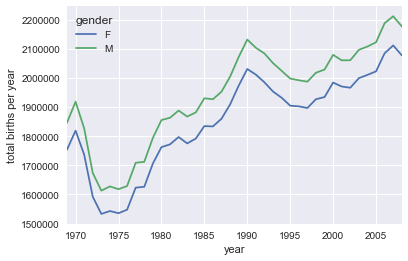

In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
pt = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
fig = pt.plot()
fig
fig.set_ylabel('total births per year')

### Further data exploration

Removing outliers:

In [299]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig
births.isnull().sum()

array([ 4358. ,  4814. ,  5289.5])

689.30999999999995

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

In [302]:
# births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births = births[(births['births'] > mu - 5 * sig) & (births['births']< mu + 5 * sig)]
births.isnull().sum()
births.shape

year      0
month     0
day       0
gender    0
births    0
decade    0
dtype: int64

(14610, 6)

In [303]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [306]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

Using this we can plot births by weekday for several decades:

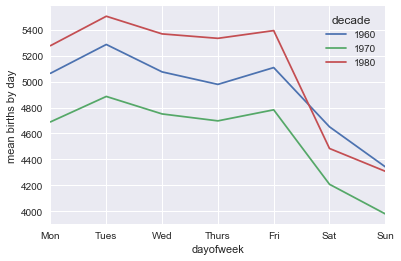

In [311]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pt = births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')
ax = pt.plot()
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
ax.set_ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the *year*.
Let's first group the data by month and day separately:

In [ ]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

The result is a multi-index over months and days.
To make this easily plottable, let's turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

In [ ]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# Vectorized String Operations

In [282]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [283]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [284]:
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [286]:
names.str.upper()

0    PETER
1     PAUL
2     None
3     MARY
4    GUIDO
dtype: object

In [725]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Notice that these have various return values. Some, like ``lower()``, return a series of strings:

In [726]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

But some others return numbers:

In [727]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

Or Boolean values:

In [353]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Still others return lists or other compound values for each element:

In [354]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

We'll see further manipulations of this kind of series-of-lists object as we continue our discussion.

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

In [728]:
monte.str.extract('([A-Za-z]+$)', expand=False)


0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [348]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

| Method | Description |
|--------|-------------|
| ``get()`` | Index each element |
| ``slice()`` | Slice each element|
| ``slice_replace()`` | Replace slice in each element with passed value|
| ``cat()``      | Concatenate strings|
| ``repeat()`` | Repeat values |
| ``normalize()`` | Return Unicode form of string |
| ``pad()`` | Add whitespace to left, right, or both sides of strings|
| ``wrap()`` | Split long strings into lines with length less than a given width|
| ``join()`` | Join strings in each element of the Series with passed separator|
| ``get_dummies()`` | extract dummy variables as a dataframe |

#### Vectorized item access and slicing

The ``get()`` and ``slice()`` operations, in particular, enable vectorized element access from each array.
For example, we can get a slice of the first three characters of each array using ``str.slice(0, 3)``.
Note that this behavior is also available through Python's normal indexing syntax–for example, ``df.str.slice(0, 3)`` is equivalent to ``df.str[0:3]``:

In [355]:
monte.str[1:3]

0    ra
1    oh
2    er
3    ri
4    er
5    ic
dtype: object

Indexing via ``df.str.get(i)`` and ``df.str[i]`` is likewise similar.

These ``get()`` and ``slice()`` methods also let you access elements of arrays returned by ``split()``.
For example, to extract the last name of each entry, we can combine ``split()`` and ``get()``:

In [360]:
monte.str.slice(3,-1)
# monte.str.split().str[-1]
# monte.str.split().iloc[-1]

0    ham Chapma
1       n Clees
2     ry Gillia
3         c Idl
4       ry Jone
5     hael Pali
dtype: object

#### Indicator variables

In [363]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [364]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


## Example: Recipe Database

These vectorized string operations become most useful in the process of cleaning up messy, real-world data.
Here I'll walk through an example of that, using an open recipe database compiled from various sources on the Web.
Our goal will be to parse the recipe data into ingredient lists, so we can quickly find a recipe based on some ingredients we have on hand.

The scripts used to compile this can be found at https://github.com/fictivekin/openrecipes, and the link to the current version of the database is found there as well.

As of Spring 2016, this database is about 30 MB, and can be downloaded and unzipped with these commands:

In [766]:
%pwd

!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz
#!gunzip recipeitems-latest.json.gz

'C:\\Users\\jos\\PycharmProjects\\ABN-AMRO\\DataScience'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    20  100    20    0     0     20      0  0:00:01 --:--:--  0:00:01    53


The database is in JSON format, so we will try ``pd.read_json`` to read it:

In [729]:
try:
    recipes = pd.read_json('data/recipes10k.json', orient='records')
except ValueError as e:
    print("ValueError:", e)

Oops! We get a ``ValueError`` mentioning that there is "trailing data."
Searching for the text of this error on the Internet, it seems that it's due to using a file in which *each line* is itself a valid JSON, but the full file is not.
Let's check if this interpretation is true:

In [732]:
with open('data/recipes10k.json') as f:
    line = f.readline()
    line2 = f.readline()
    print(line2)


Yes, apparently each line is a valid JSON, so we'll need to string them together.
One way we can do this is to actually construct a string representation containing all these JSON entries, and then load the whole thing with ``pd.read_json``:

In [736]:
# read the entire file into a Python array
# with open('data/recipes10k.json', 'r', encoding='utf-8') as f:
#     # Extract each line
#     data = (line.strip() for line in f)
#     # Reformat so each line is the element of a list
#     data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [737]:
recipes.shape
recipes[:10000].to_json("data/recipes10k.json", orient='records')
# recipes[:50000].to_json("data/recipes50k.json", orient='records')
# recipes[:100000].to_json("data/recipes100k.json", orient='records')
# recipes.to_json("data/recipes.json", orient='records')
recipes2 = pd.read_json("data/recipes10k.json")
recipes2.head()


(1, 10000)

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,"{'_id': {'$oid': '5160756b96cc62079cc2db15'}, ...","{'_id': {'$oid': '5160756d96cc62079cc2db16'}, ...","{'_id': {'$oid': '5160757896cc62079cc2db1a'}, ...","{'_id': {'$oid': '5160761896cc6208b3300144'}, ...","{'_id': {'$oid': '516078af96cc6208ac7c9e22'}, ...","{'_id': {'$oid': '516078af96cc6208c1793546'}, ...","{'_id': {'$oid': '516078b196cc6208b3300229'}, ...","{'_id': {'$oid': '516078b196cc6208c1793547'}, ...","{'_id': {'$oid': '516078b296cc6208ac7c9e23'}, ...","{'_id': {'$oid': '516078b396cc6208b330022a'}, ...",...,"{'_id': {'$oid': '5160d51096cc620d188cb487'}, ...","{'_id': {'$oid': '5160d51196cc620d188cb488'}, ...","{'_id': {'$oid': '5160d51296cc620d26153347'}, ...","{'_id': {'$oid': '5160d51396cc620d188cb489'}, ...","{'_id': {'$oid': '5160d51496cc620d188cb48a'}, ...","{'_id': {'$oid': '5160d51496cc620d26153348'}, ...","{'_id': {'$oid': '5160d51596cc620d188cb48b'}, ...","{'_id': {'$oid': '5160d51796cc620d188cb48c'}, ...","{'_id': {'$oid': '5160d51896cc620d188cb48d'}, ...","{'_id': {'$oid': '5160d51896cc620d26153349'}, ..."


We see there are nearly 200,000 recipes, and 17 columns.
Let's take a look at one row to see what we have:

In [780]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

There is a lot of information there, but much of it is in a very messy form, as is typical of data scraped from the Web.
In particular, the ingredient list is in string format; we're going to have to carefully extract the information we're interested in.
Let's start by taking a closer look at the ingredients:

In [ ]:
recipes.ingredients.str.len().describe()

The ingredient lists average 250 characters long, with a minimum of 0 and a maximum of nearly 10,000 characters!

Just out of curiousity, let's see which recipe has the longest ingredient list:

In [ ]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

That certainly looks like an involved recipe.

We can do other aggregate explorations; for example, let's see how many of the recipes are for breakfast food:

In [ ]:
recipes.description.str.contains('[Bb]reakfast').sum()

Or how many of the recipes list cinnamon as an ingredient:

In [ ]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

We could even look to see whether any recipes misspell the ingredient as "cinamon":

In [ ]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

This is the type of essential data exploration that is possible with Pandas string tools.
It is data munging like this that Python really excels at.

### A simple recipe recommender

Let's go a bit further, and start working on a simple recipe recommendation system: given a list of ingredients, find a recipe that uses all those ingredients.
While conceptually straightforward, the task is complicated by the heterogeneity of the data: there is no easy operation, for example, to extract a clean list of ingredients from each row.
So we will cheat a bit: we'll start with a list of common ingredients, and simply search to see whether they are in each recipe's ingredient list.
For simplicity, let's just stick with herbs and spices for the time being:

In [ ]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

We can then build a Boolean ``DataFrame`` consisting of True and False values, indicating whether this ingredient appears in the list:

In [ ]:
import re
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

Now, as an example, let's say we'd like to find a recipe that uses parsley, paprika, and tarragon.
We can compute this very quickly using the ``query()`` method of ``DataFrame``s, discussed in [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb):

In [ ]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

We find only 10 recipes with this combination; let's use the index returned by this selection to discover the names of the recipes that have this combination:

In [ ]:
recipes.name[selection.index]

# Working with Time Series

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

### Native Python dates and times: ``datetime`` and ``dateutil``

Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [287]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [290]:
from dateutil import parser
date = parser.parse("July 4 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [291]:
date.strftime('%A')

'Saturday'

See the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).

Documentation of other useful date utilities: [dateutil's online documentation](http://labix.org/python-dateutil).

[``pytz``](http://pytz.sourceforge.net/) contains tools for working with time zones.

### Typed arrays of times: NumPy's ``datetime64``

In [293]:
import numpy as np
date = np.array('2015-04-07', dtype=np.datetime64)
date
# date.astype('datetime64[m]')

array(datetime.date(2015, 4, 7), dtype='datetime64[D]')

Vectorized operations:

In [294]:
date + np.arange(12)

array(['2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10',
       '2015-04-11', '2015-04-12', '2015-04-13', '2015-04-14',
       '2015-04-15', '2015-04-16', '2015-04-17', '2015-04-18'], dtype='datetime64[D]')

In [297]:
np.datetime64('2015-07-04', 'm') + [4,6]

array(['2015-07-04T00:04', '2015-07-04T00:06'], dtype='datetime64[m]')

Here is a minute-based datetime:

In [471]:
np.datetime64('2015-07-04 12:00').dtype

dtype('<M8[m]')

In [494]:
np.datetime64('2015-07-04 12:59:59.50', 'Y').dtype

dtype('<M8[Y]')

[NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html) lists available format codes along with relative and absolute timespans:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### Dates and times in pandas: best of both worlds

``Timestamp`` object combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.

Using ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` to index data in a ``Series`` or ``DataFrame``.


In [301]:
import pandas as pd
date = pd.to_datetime(" 2015-10-10")
date

Timestamp('2015-10-10 00:00:00')

In [302]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [304]:
import numpy as np 
 
dd = date + pd.to_timedelta(np.arange(12), 'M')
dd

date + pd.DateOffset(months=1)
pd.date_range(date, periods=12, freq='M') #+ pd.DateOffset(months=1)

DatetimeIndex(['2015-10-10 00:00:00', '2015-11-09 10:29:06',
               '2015-12-09 20:58:12', '2016-01-09 07:27:18',
               '2016-02-08 17:56:24', '2016-03-10 04:25:30',
               '2016-04-09 14:54:36', '2016-05-10 01:23:42',
               '2016-06-09 11:52:48', '2016-07-09 22:21:54',
               '2016-08-09 08:51:00', '2016-09-08 19:20:06'],
              dtype='datetime64[ns]', freq=None)

Timestamp('2015-11-10 00:00:00')

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31',
               '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30'],
              dtype='datetime64[ns]', freq='M')

In [307]:
from pandas.tseries.offsets import BDay, MonthEnd
day = BDay()
m = MonthEnd()
day.apply(pd.Timestamp('2014-01-16 09:00'))
pd.Timestamp('2014-01-16 09:00') + 6*day

Timestamp('2014-01-17 09:00:00')

Timestamp('2014-01-24 09:00:00')

## Pandas Time Series: Indexing by Time

In [309]:
index = pd.date_range(date, periods=18, freq='W')
data = pd.Series(np.arange(18), index=index)
data

2015-10-11     0
2015-10-18     1
2015-10-25     2
2015-11-01     3
2015-11-08     4
2015-11-15     5
2015-11-22     6
2015-11-29     7
2015-12-06     8
2015-12-13     9
2015-12-20    10
2015-12-27    11
2016-01-03    12
2016-01-10    13
2016-01-17    14
2016-01-24    15
2016-01-31    16
2016-02-07    17
Freq: W-SUN, dtype: int32

In [311]:
data['2016']

2016-01-03    12
2016-01-10    13
2016-01-17    14
2016-01-24    15
2016-01-31    16
2016-02-07    17
Freq: W-SUN, dtype: int32

In [548]:
data['2015-12']

2015-12-06     8
2015-12-13     9
2015-12-20    10
2015-12-27    11
Freq: W-SUN, dtype: int32

## Pandas Time Series Data Structures

- For *time stamps*, the ``Timestamp`` type, associated Index structure ``DatetimeIndex``.
- For *time Periods*, the ``Period`` type. A fixed-frequency interval based on ``numpy.datetime64`` with index ``PeriodIndex``.
- For *time deltas* or *durations*, the ``Timedelta`` type, a more efficient replacement for Python's native ``datetime.timedelta`` type, based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

In [312]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [313]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [570]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [569]:
dd = dates.to_period('D')
dd
dd - dd[0]

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

Int64Index([0, 1, 3, 4, 5], dtype='int64')

### Regular sequences: ``pd.date_range()``, ``pd.period_range()``, ``pd.timedelta_range()`` 

In [841]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Or with a startpoint and a number of periods:

In [842]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing is set by the ``freq`` argument:

In [536]:
dd = pd.date_range('2015-07-03', periods=2, freq='3MS')
dd

DatetimeIndex(['2015-08-01', '2015-11-01'], dtype='datetime64[ns]', freq='3MS')

In [511]:
pi = pd.period_range('2015-07', periods=8, freq='A')
pi

PeriodIndex(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='period[A-DEC]', freq='A-DEC')

In [173]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset.
Just as we saw the ``D`` (day) and ``H`` (hour) codes above, we can use such codes to specify any desired frequency spacing.
The following table summarizes the main codes available:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period.
By adding an ``S`` suffix to any of these, they instead will be marked at the beginning:

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | Month start            ||``BMS``  | Business month start   |
| ``QS``  | Quarter start          ||``BQS``  | Business quarter start |
| ``AS``  | Year start             ||``BAS``  | Business year start    |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

On top of this, codes can be combined with numbers to specify other frequencies.
For example, for a frequency of 2 hours 30 minutes, we can combine the hour (``H``) and minute (``T``) codes as follows:

In [382]:
pd.timedelta_range(0, periods=9, freq="2H30T")
pd.date_range("2010-2", periods=9, freq="A-FEB")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

DatetimeIndex(['2010-02-28', '2011-02-28', '2012-02-29', '2013-02-28',
               '2014-02-28', '2015-02-28', '2016-02-29', '2017-02-28',
               '2018-02-28'],
              dtype='datetime64[ns]', freq='A-FEB')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the ``pd.tseries.offsets`` module.
For example, we can create a business day offset directly as follows:

In [314]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=14, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-20'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

In [315]:
from pandas_datareader import data, google
#google.daily.GoogleDailyReader().url =  'http://finance.google.com/finance/historical'
goog = data.DataReader('GOOG', start='2008', end='2016',
                       data_source='yahoo')
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,347.027924,348.975250,343.058746,343.505829,343.505829,4783200
2008-01-02,344.196320,346.431793,336.675262,340.381134,340.381134,8669700
2008-01-03,340.415924,341.205780,336.074158,340.450684,340.450684,6547200
2008-01-04,337.648926,338.279816,325.383698,326.377228,326.377228,10789200
2008-01-07,324.857117,329.000183,316.615723,322.527283,322.527283,12890000


For simplicity, we'll use just the closing price:

In [316]:
goog = goog['Close']

In [318]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

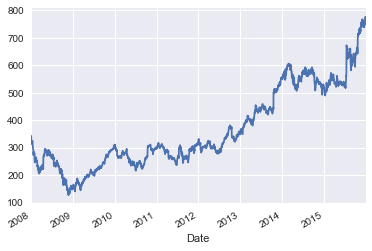

In [319]:
goog.plot();

### Resampling and converting frequencies

 ``resample()`` for *data aggregation*
 
 ``asfreq()`` for *data selection*.

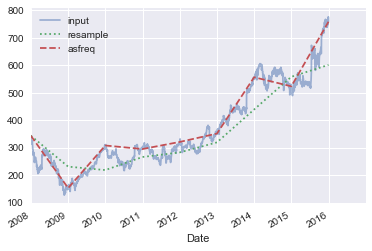

In [320]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

up-sampling: ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.

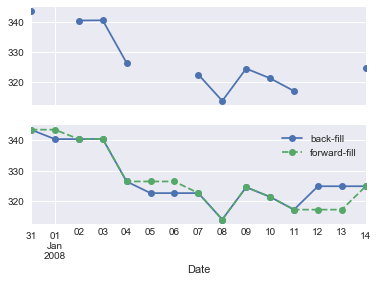

In [399]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-shifts

``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*

(2016,)
(2923,)


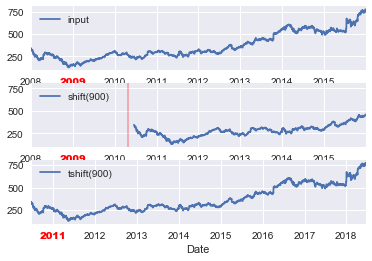

In [400]:
fig, ax = plt.subplots(3, sharey=True)
print(goog.shape)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
print(goog.shape)

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

one-year return on investment for Google stock over the course of the dataset:

In [ ]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation (see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)).
This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

Rolling [window=365,center=True,axis=0]

Date
2007-12-31   NaN
2008-01-01   NaN
2008-01-02   NaN
2008-01-03   NaN
2008-01-04   NaN
Freq: D, Name: Close, dtype: float64


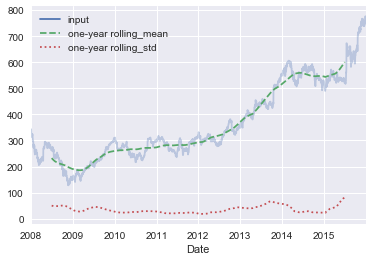

In [401]:
rolling = goog.rolling(365, center=True)
rolling
print(rolling.mean().head())

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

As with group-by operations, the ``aggregate()`` and ``apply()`` methods can be used for custom rolling computations.

## Example: Visualizing Seattle Bicycle Counts

In [321]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 81318    0 81318    0     0  40659      0 --:--:--  0:00:02 --:--:-- 31360
100  399k    0  399k    0     0   133k      0 --:--:--  0:00:03 --:--:--  109k
100 1246k    0 1246k    0     0   311k      0 --:--:--  0:00:04 --:--:--  275k
100 1329k    0 1329k    0     0   332k      0 --:--:--  0:00:04 --:--:--  340k


In [322]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [ ]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

Now let's take a look at the summary statistics for this data:

In [ ]:
data.dropna().describe()

### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [ ]:
%matplotlib inline
import seaborn; seaborn.set()

In [ ]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

In [ ]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

In [ ]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [ ]:
by_time = data.groupby(data.index.time).mean()
print(by_time)
hourly_ticks = 4 * 60 * 60 * np.arange(6)
print(hourly_ticks)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

# High-Performance Pandas: eval() and query()

``eval()`` and ``query()`` rely on the [Numexpr](https://github.com/pydata/numexpr) package.
Break up arrays when too large to fit in cache of CPU, no intermediary arrays, automatic multi-threading 

## Motivating ``query()`` and ``eval()``: Compound Expressions

We've seen previously that NumPy and Pandas support fast vectorized operations; for example, when adding the elements of two arrays.

In [579]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(10**8)
y = rng.rand(10**8)
%timeit x + y

417 ms ± 6.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Less efficient when computing compound expressions.

In [580]:
%timeit mask = (x > 0.5) & (y < 0.5) | (x > 2)

392 ms ± 8.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Roughly equivalent to:

In [408]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [581]:
import numexpr
%timeit mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5) | (x > 2)')

248 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## ``pandas.eval()`` for Efficient Operations

In [582]:
nrows, ncols = 1000000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

To compute the sum of all four ``DataFrame``s using the typical Pandas approach, we can just write the sum:

In [583]:
%timeit df1 + df2 + df3 + df4

1.02 s ± 412 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The same result can be computed via ``pd.eval`` by constructing the expression as a string:

In [584]:
%timeit pd.eval('df1 + df2 + df3 + df4')

322 ms ± 8.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The ``eval()`` version of this expression is about 50% faster (and uses much less memory), while giving the same result:

In [585]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

### Operations supported by ``pd.eval()``

In [586]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

#### Arithmetic operators
``pd.eval()`` supports all arithmetic operators. For example:

In [587]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

#### Comparison operators
``pd.eval()`` supports all comparison operators, including chained expressions:

In [588]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

#### Bitwise operators
``pd.eval()`` supports the ``&`` and ``|`` bitwise operators:

In [589]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In addition, it supports the use of the literal ``and`` and ``or`` in Boolean expressions:

In [590]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

#### Object attributes and indices

``pd.eval()`` supports access to object attributes via the ``obj.attr`` syntax, and indexes via the ``obj[index]`` syntax:

In [591]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

#### Other operations
Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently *not* implemented in ``pd.eval()``.
If you'd like to execute these more complicated types of expressions, you can use the Numexpr library itself.

## ``DataFrame.eval()`` for Column-Wise Operations

Just as Pandas has a top-level ``pd.eval()`` function, ``DataFrame``s have an ``eval()`` method that works in similar ways.
The benefit of the ``eval()`` method is that columns can be referred to *by name*.
We'll use this labeled array as an example:

In [592]:
import pandas as pd
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.350317,0.229595,0.083845
1,0.328702,0.063538,0.083904
2,0.856127,0.340678,0.478523
3,0.808805,0.668873,0.830758
4,0.160789,0.025621,0.595533


Using ``pd.eval()`` as above, we can compute expressions with the three columns like this:

In [593]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

The ``DataFrame.eval()`` method allows much more succinct evaluation of expressions with the columns:

In [594]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

Notice here that we treat *column names as variables* within the evaluated expression, and the result is what we would wish.

### Assignment in DataFrame.eval()

In addition to the options just discussed, ``DataFrame.eval()``  also allows assignment to any column.
Let's use the ``DataFrame`` from before, which has columns ``'A'``, ``'B'``, and ``'C'``:

In [595]:
df.head()

,A,B,C
0,0.350317,0.229595,0.083845
1,0.328702,0.063538,0.083904
2,0.856127,0.340678,0.478523
3,0.808805,0.668873,0.830758
4,0.160789,0.025621,0.595533


We can use ``df.eval()`` to create a new column ``'D'`` and assign to it a value computed from the other columns:

In [596]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.350317,0.229595,0.083845,6.916444
1,0.328702,0.063538,0.083904,4.674883
2,0.856127,0.340678,0.478523,2.501041
3,0.808805,0.668873,0.830758,1.778709
4,0.160789,0.025621,0.595533,0.313013


In the same way, any existing column can be modified:

In [597]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.350317,0.229595,0.083845,1.439825
1,0.328702,0.063538,0.083904,3.160335
2,0.856127,0.340678,0.478523,1.077166
3,0.808805,0.668873,0.830758,0.168439
4,0.160789,0.025621,0.595533,0.226969


### Local variables in DataFrame.eval()

The ``DataFrame.eval()`` method supports an additional syntax that lets it work with local Python variables.
Consider the following:

In [598]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

The ``@`` character here marks a *variable name* rather than a *column name*, and lets you efficiently evaluate expressions involving the two "namespaces": the namespace of columns, and the namespace of Python objects.
Notice that this ``@`` character is only supported by the ``DataFrame.eval()`` *method*, not by the ``pandas.eval()`` *function*, because the ``pandas.eval()`` function only has access to the one (Python) namespace.

## DataFrame.query() Method

The ``DataFrame`` has another method based on evaluated strings, called the ``query()`` method.
Consider the following:

In [ ]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

As with the example used in our discussion of ``DataFrame.eval()``, this is an expression involving columns of the ``DataFrame``.
It cannot be expressed using the ``DataFrame.eval()`` syntax, however!
Instead, for this type of filtering operation, you can use the ``query()`` method:

In [ ]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

In addition to being a more efficient computation, compared to the masking expression this is much easier to read and understand.
Note that the ``query()`` method also accepts the ``@`` flag to mark local variables:

In [ ]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

## Performance: When to Use These Functions

When considering whether to use these functions, there are two considerations: *computation time* and *memory use*.
Memory use is the most predictable aspect. As already mentioned, every compound expression involving NumPy arrays or Pandas ``DataFrame``s will result in implicit creation of temporary arrays:
For example, this:

In [ ]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

Is roughly equivalent to this:

In [ ]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

If the size of the temporary ``DataFrame``s is significant compared to your available system memory (typically several gigabytes) then it's a good idea to use an ``eval()`` or ``query()`` expression.
You can check the approximate size of your array in bytes using this:

In [ ]:
df.values.nbytes

# Further Resources

In this chapter, we've covered many of the basics of using Pandas effectively for data analysis.
Still, much has been omitted from our discussion.
To learn more about Pandas, I recommend the following resources:

- [Pandas online documentation](http://pandas.pydata.org/): This is the go-to source for complete documentation of the package. While the examples in the documentation tend to be small generated datasets, the description of the options is complete and generally very useful for understanding the use of various functions.

- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) Written by Wes McKinney (the original creator of Pandas), this book contains much more detail on the Pandas package than we had room for in this chapter. In particular, he takes a deep dive into tools for time series, which were his bread and butter as a financial consultant. The book also has many entertaining examples of applying Pandas to gain insight from real-world datasets. Keep in mind, though, that the book is now several years old, and the Pandas package has quite a few new features that this book does not cover (but be on the lookout for a new edition in 2017).

- [Stack Overflow](http://stackoverflow.com/questions/tagged/pandas): Pandas has so many users that any question you have has likely been asked and answered on Stack Overflow. Using Pandas is a case where some Google-Fu is your best friend. Simply go to your favorite search engine and type in the question, problem, or error you're coming across–more than likely you'll find your answer on a Stack Overflow page.

- [Pandas on PyVideo](http://pyvideo.org/search?q=pandas): From PyCon to SciPy to PyData, many conferences have featured tutorials from Pandas developers and power users. The PyCon tutorials in particular tend to be given by very well-vetted presenters.

Using these resources, combined with the walk-through given in this chapter, my hope is that you'll be poised to use Pandas to tackle any data analysis problem you come across!

<!--NAVIGATION-->
< [High-Performance Pandas: eval() and query()](03.12-Performance-Eval-and-Query.ipynb) | [Contents](Index.ipynb) | [Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) >